# Pandas
- csv, pdf 그리고 hdf 등 읽을 수 있음 `pd.read_hdf()`

In [15]:
import os
import pandas as pd
import numpy as np

In [3]:
PATH = os.getenv('HOME')

In [4]:
df = pd.read_csv(PATH + '/data/trends-extend.csv')
df.head()

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,전국 기준일,전국 확진,전국 추가 확진,전국 치료중,전국 퇴원,전국 사망
0,2021-12-04 00:00:00,163146,2273,25818,136150,1064,1178,2021-12-04 00:00:00,467907,5352,58555,405543,3809
1,2021-12-03 00:00:00,160873,2099,24639,135086,1889,1148,2021-12-03 00:00:00,462555,4944,55397,403419,3739
2,2021-12-02 00:00:00,158774,2268,24441,133197,1330,1136,2021-12-02 00:00:00,457612,5266,53322,400585,3705
3,2021-12-01 00:00:00,156507,2222,23527,131867,1299,1113,2021-12-01 00:00:00,452350,5123,50368,398323,3659
4,2021-11-30 00:00:00,154286,1186,22618,130568,1264,1100,2021-11-30 00:00:00,447230,3032,47536,396070,3624


In [5]:
df.shape

(664, 13)

In [6]:
df.columns

Index(['서울시 기준일', '서울시 확진자', '서울시 추가 확진', '서울시 치료중', '서울시 퇴원', '서울시 추가 퇴원',
       '서울시 사망', '전국 기준일', '전국 확진', '전국 추가 확진', '전국 치료중', '전국 퇴원', '전국 사망'],
      dtype='object')

# Clean and Validate
### Describe
`series.value_counts().sort_index()`
`series.describe()`
### Replace
`series.replace([98, 99], np.nan, inplace=True)`
### Arithmetic with Series
`series_new = s1 + s2 / 16.0`


# Filter and visualize
### Histogram
`plt.hist(series.dropna(), bins=30)`

In [8]:
# Boolean Series

added_cases = df['서울시 추가 확진'] > 2000
added_cases.head()

0     True
1     True
2     True
3     True
4    False
Name: 서울시 추가 확진, dtype: bool

In [9]:
added_cases.sum()

4

### 2000 이상 평균

In [12]:
cases = df['서울시 추가 확진'][added_cases]
cases.mean()

2215.5

### 2000 이하 평균

In [13]:
cases = df['서울시 추가 확진'][~added_cases]
cases.mean()

224.91666666666666

# Filtering
### logical operators:
- `&` for AND
- `|` for OR

In [21]:
whole_over_5000 = df['전국 추가 확진'] > 5000
whole_over_5000.sum()

3

In [22]:
seoul_over_2000 = added_cases
added_cases.sum()

4

In [23]:
df[whole_over_5000 & seoul_over_2000]

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,전국 기준일,전국 확진,전국 추가 확진,전국 치료중,전국 퇴원,전국 사망
0,2021-12-04 00:00:00,163146,2273,25818,136150,1064,1178,2021-12-04 00:00:00,467907,5352,58555,405543,3809
2,2021-12-02 00:00:00,158774,2268,24441,133197,1330,1136,2021-12-02 00:00:00,457612,5266,53322,400585,3705
3,2021-12-01 00:00:00,156507,2222,23527,131867,1299,1113,2021-12-01 00:00:00,452350,5123,50368,398323,3659


In [24]:
df[~whole_over_5000 & seoul_over_2000]

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,전국 기준일,전국 확진,전국 추가 확진,전국 치료중,전국 퇴원,전국 사망
1,2021-12-03 00:00:00,160873,2099,24639,135086,1889,1148,2021-12-03 00:00:00,462555,4944,55397,403419,3739


### PMF
- 정확히 그 값
### CDF
- 누적합

# The normal distribution
`np.random.normal(size=)` 

# The noraml CDF

In [32]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)

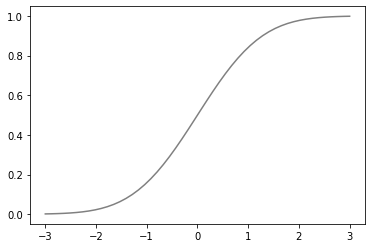

In [30]:
plt.plot(xs, ys, color='gray')

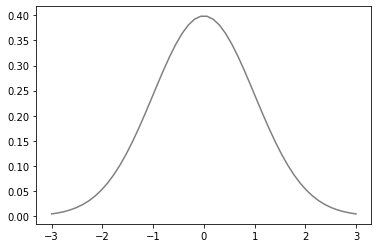

In [31]:
xs = np.linspace(-3, 3)
ys = norm(0,1).pdf(xs)
plt.plot(xs, ys, color='gray')

<AxesSubplot:ylabel='Density'>

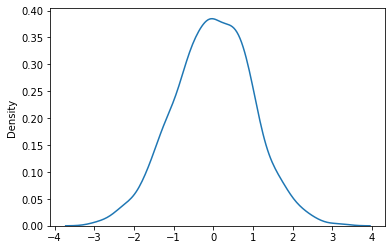

In [37]:
sns.kdeplot(sample)

In [36]:
sample = np.random.normal(size=1000)

<AxesSubplot:ylabel='Density'>

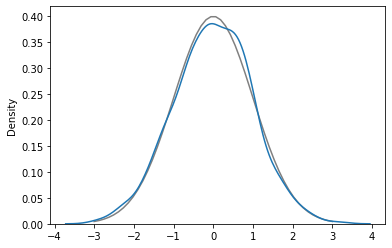

In [38]:
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)

# PMF, CDF, KDE
- Use CDFs for explortation.
- Use PMFs if there are a small number of unique values.
- Use KDE if there are a lot of values